# Ford GoBike System Data
## by Sara Glal

## Preliminary Wrangling


> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the dataset and describing its properties

In [2]:
bike_df = pd.read_csv('fordgobike-tripdata.csv')
bike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
bike_df.shape

(183412, 16)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> The dataset contains 183412 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

> How long does the average trip take? what are features that affect the duration of the trip? Is Gender, or Age, or the time or user type?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration, start time, end time, member gender, biith year, user type.

In [7]:
df = bike_df.copy()
df = df[['duration_sec', 'start_time', 'end_time', 'user_type', 'member_birth_year', 'member_gender']]
df.head(1)

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Customer,1984.0,Male


In [8]:
df.isna().sum()

duration_sec            0
start_time              0
end_time                0
user_type               0
member_birth_year    8265
member_gender        8265
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.shape

(175147, 6)

In [11]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [12]:
# Seperate the start time to day, month, year, hour, and minute
df['start_year']  = df.start_time.dt.year
df['start_month']  = df.start_time.dt.month
# df['start_day']  = df.start_time.dt.day
df['start_day'] = df.start_time.dt.strftime('%a')
df['start_hour']  = df.start_time.dt.hour
df['start_minute']  = df.start_time.dt.minute

# calculate the age
df['age'] = df.start_year - df.member_birth_year


In [13]:
df.head(1)

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,start_year,start_month,start_day,start_hour,start_minute,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Customer,1984.0,Male,2019,2,Thu,17,32,35.0


## Univariate Exploration

investigating distributions of individual variables and cleaning data

In [14]:
df.duration_sec.describe()

count    175147.000000
mean        704.211845
std        1641.608363
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [15]:
def draw_hist(x, xlim1, xlim2, xlabel, ylabel, title, bins):
    plt.figure(figsize = [10, 8]) 
    plt.hist(x, color='navy', bins=bins);
    plt.xlim(xlim1, xlim2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

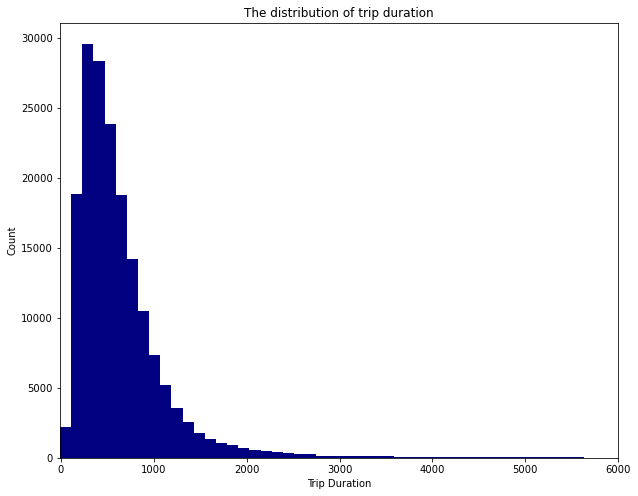

In [16]:
x = df.duration_sec
bins = np.arange(-10, x.max()+10, 120)
draw_hist(x, -10, 6000, 'Trip Duration', 'Count', 'The distribution of trip duration', bins)

The duration distribution is right-skewed and there are outliers

In [17]:
np.log10(df.duration_sec.describe())

count    5.243403
mean     2.847703
std      3.215270
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

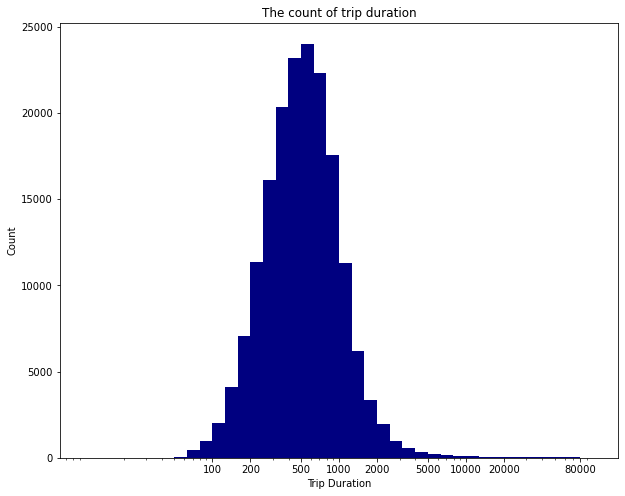

In [18]:
x = df.duration_sec
bins = 10 ** np.arange(1, 5+0.1, 0.1)
plt.figure(figsize = [10, 8]) 
plt.hist(x, color='navy', bins=bins);
# plt.xlim(-10, 6000)
plt.xscale('log')
ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 80000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.title('The count of trip duration');


after applying log transformation it shows that trip duration is normal distribution

In [19]:
def draw_bar(x, y, xlabel, ylabel, title)
    plt.figure(figsize = [10, 8]) 
    plt.bar(x, y,color='navy');
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

SyntaxError: invalid syntax (<ipython-input-19-ffc5a8558817>, line 1)

In [ ]:
x = df.user_type.unique()
y = df.user_type.value_counts(sort=False)
draw_bar(x, y, 'User Type', 'Count', 'Count of the user types')

The plot shows that most of the users are subscriber

In [ ]:
x = df.member_gender.unique()
y = df.member_gender.value_counts(sort=False)
draw_bar(x, y, 'Member Gender', 'Count', 'Count of the member gender')

The plot shows that male is highest gender

In [ ]:
df.age.describe()

In [ ]:
x = df.age
bins = np.arange(18, df.age.max()+5, 5)
draw_hist(x, 15, 100, 'Age', 'Count', 'The distribution of the age', bins)

The distribution of the age is right-skewed and that's normal but there are outliers point 90 maybe it's normal but 140 definitely it's not normal.

In [ ]:
df.start_year.unique()

In [ ]:
df.start_month.unique()

In [ ]:
days=df.start_day.unique()
days

In [ ]:
x = days
y = df.start_day.value_counts(sort=False)

draw_bar(x, y, 'Day', 'Count', 'Count of the trip day')

The trips on the weekdays are more than on the weekends.

In [ ]:
df.start_hour.unique()

In [ ]:
x=df.start_hour
bins=np.arange(0, df.start_hour.max()+1, 1)
draw_hist(x, -10, 6000, 'Hours', 'Count', 'The distribution of the start hour', bins)

The plot shows that in point 13 it's a kind of symmetric 
That's because of early birds people and night owls people.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the trip duration is right-skewed, It has outliers and it requires a scale transformation.

> The Age is right-skewed and most people are between 25 to 40, It has some problems with outliers.

> The most trip day is wednesday and weekdays have trips more than weekends.

> Most of the people are a subscriber and also males.

> The most common hour that the trip start is about 8am or 5pm.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to change the data to get the information that would help me in the investigation.

## Bivariate Exploration

investigating relationships between pairs of variables in data

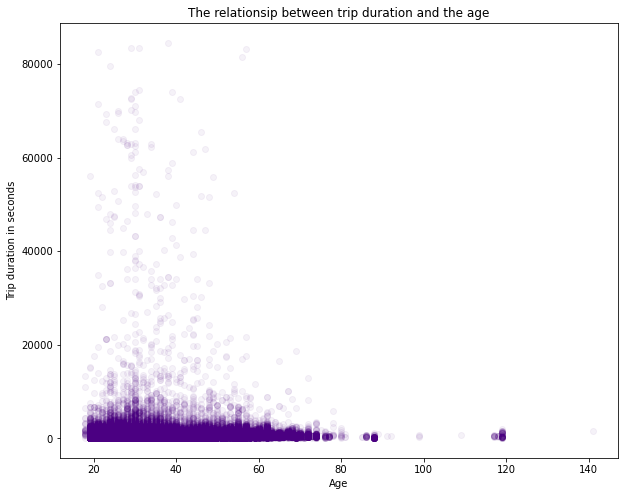

In [20]:
plt.figure(figsize=[10,8])
plt.scatter(x=df.age, y=df.duration_sec, color='indigo', alpha=1/20)
plt.xlabel('Age')
plt.ylabel('Trip duration in seconds')
plt.title('The relationsip between trip duration and the age');

The trip duration decreases while the age increases as expected.

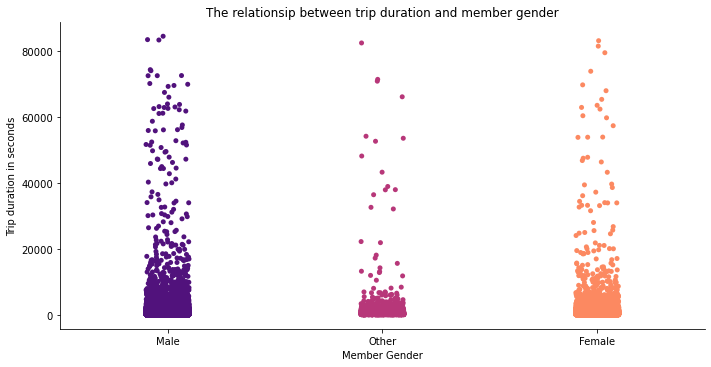

In [21]:
# plt.figure(figsize=[10,8])
sb.catplot(data=df, x="member_gender", y="duration_sec", height = 5, palette='magma', aspect=2)

plt.xlabel('Member Gender')
plt.ylabel('Trip duration in seconds')
plt.title('The relationsip between trip duration and member gender');


Males are the most gender but they all making a long trip duration.

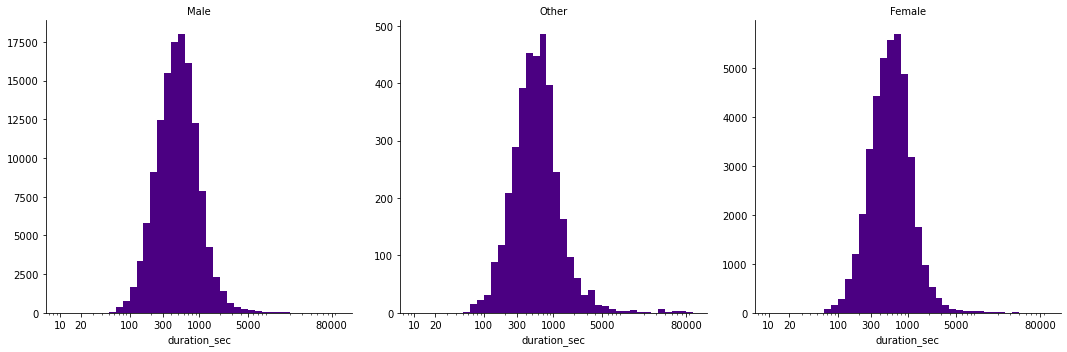

In [22]:
bins = 10 ** np.arange(1, 5+0.1, 0.1)
g = sb.FacetGrid(data=df, col='member_gender', col_wrap=3, sharey=False, height = 5)
g.map(plt.hist, 'duration_sec', bins=bins, color='indigo');
g.set_titles('{col_name}')
plt.xscale('log')
ticks = [10, 20, 100, 300, 1000, 5000, 80000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);


In [23]:
# plt.figure(figsize=[10,8])
# sb.barplot(data = df, x = 'start_hour', y = 'duration_sec',
#                color = 'indigo')
# plt.xlabel('Trip start hour')
# plt.ylabel('Trip duraion')
# plt.title('The relationship between trip duration and trip start hour');

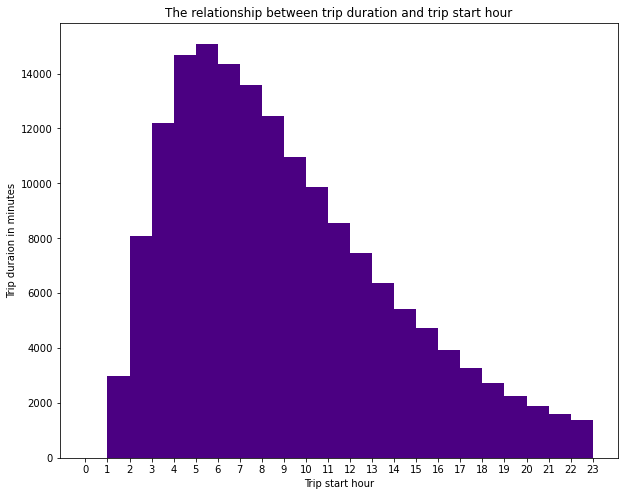

In [24]:
plt.figure(figsize=[10,8])
hours = sorted(df.start_hour.unique())
plt.hist(df['duration_sec']/60, hours, histtype='bar', color = 'indigo')
plt.xticks(hours)
plt.xlabel('Trip start hour')
plt.ylabel('Trip duraion in minutes')
plt.title('The relationship between trip duration and trip start hour');

It seems that trip start hour has a strong relationship with the trip duration.

Early trips have the longest trip duration.

/usr/local/Caskroom/miniconda/base/envs/lus/lib/python3.6/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


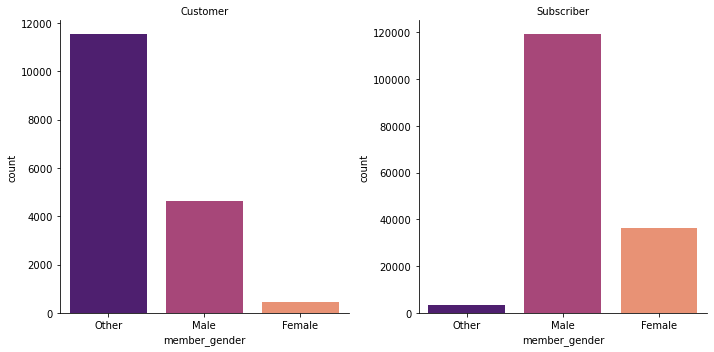

In [25]:
g = sb.FacetGrid(data=df, col='user_type', col_wrap=3, sharey=False, height = 5)
g.map(sb.countplot, 'member_gender',  palette='magma');
g.set_titles('{col_name}');


It seems that most of the subscriber are males, and most of the customer are other

/usr/local/Caskroom/miniconda/base/envs/lus/lib/python3.6/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


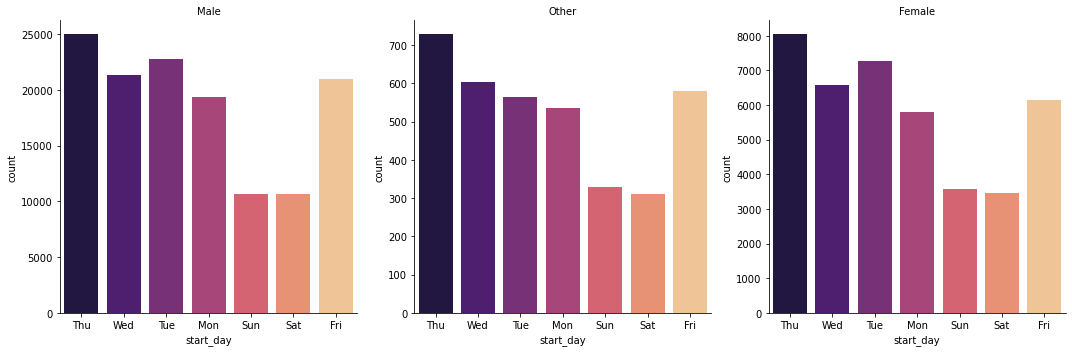

In [26]:
g = sb.FacetGrid(data=df, col='member_gender', col_wrap=3, sharey=False, height = 5)
g.map(sb.countplot, 'start_day',  palette='magma');
g.set_titles('{col_name}');


It seems that the proportion of the gender is the same for all the days.

and Thursday is the favorite for all genders.

/usr/local/Caskroom/miniconda/base/envs/lus/lib/python3.6/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


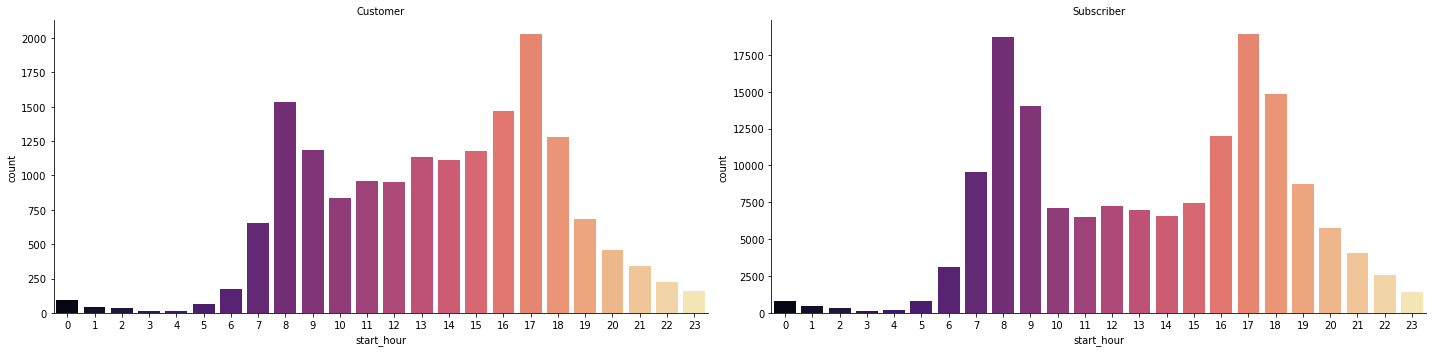

In [27]:
g = sb.FacetGrid(data=df,col='user_type', col_wrap = 2, height = 5, aspect=2, sharey=False)
g.map(sb.countplot, 'start_hour', palette='magma');
g.set_titles('{col_name}');


As we see there are two favourite hours at (8 am and 5 pm) and that's for all users.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected trip duration is decreasing while the age is increasing.
Males are the most that but they all have a long trip duration.
Early trips have the longest trip duration and its decreasing over time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the subscriber are males, in contrast, most of the customers are others.
Thursday has the most trips for all genders.


## Multivariate Exploration

Create plots of three or more variables to investigate the data even further.

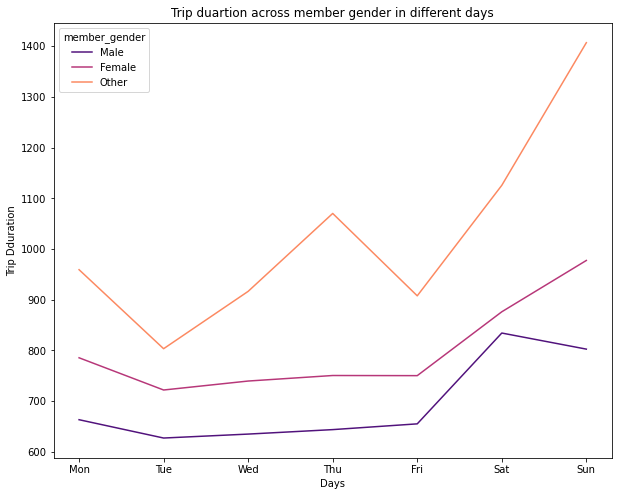

In [42]:
df.start_day=pd.Categorical(df.start_day,categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df=df.sort_values('start_day')

plt.figure(figsize = [10,8])
sb.lineplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'member_gender', palette = 'magma', ci=None)
plt.xticks(days)
plt.title('Trip duartion across member gender in different days')
plt.ylabel('Trip Dduration')
plt.xlabel('Days');


It seems that others have the longest trip duration in sunday and in general

In [38]:
# sb.catplot(data=df, x='start_day', col='start_hour',hue='user_type',kind='count', sharey=True,
#          col_wrap = 4, height = 4, aspect=2);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In sunday others are making the longest trip duration.

### Were there any interesting or surprising interactions between features?

> No.

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input --no-prompt